In [1]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({"font.size":16})

<Figure size 432x288 with 0 Axes>

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import phenom
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [3]:
catalogue_dir = "/Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022"

In [4]:
df = pd.read_csv(os.path.join(catalogue_dir, 'metadata.csv'))

In [5]:
times = np.load(os.path.join(catalogue_dir, 'times.npy'))

In [6]:
strains = np.load(os.path.join(catalogue_dir, 'strains.npy'))

In [7]:
strains.shape

(55, 8620)

In [8]:
df.shape

(55, 6)

In [14]:
amps=np.array([np.abs(strain) for strain in strains])
phases=np.array([np.unwrap(np.angle(strain)) for strain in strains])
freqs=np.array([IUS(times, phase).derivative()(times) for phase in phases])

In [9]:
df

name      q     fring     fdamp  duration  t_final
0    q18a0a0c025_96_fine  18.00  0.063334  0.014140    1020.0    465.8
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8
4      q10c25e_T_112_448  10.00  0.066184  0.014119    1157.7    121.6
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1
6        q18a0a0c025_144  18.00  0.063334  0.014140    1028.3     88.8
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8
8        q18a0a0c025_120  18.00  0.063334  0.014140    1027.5    174.7
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8
10     SXS_BBH_0107_Res3   5.00  0.071862  0.014048    7440.1    449.9
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1
12     SXS_BBH_0107_Res5   5.00  0.071862  0.014048    7465.5    451.5
13     SXS_BBH_0107_Res4   5.00  0.071862  0.014048    7457.2    449.8
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8
15     SXS_BBH_0169_Res4   2.00  0.083149  0.013774    3458.2    406.7
16     SXS_BBH_0169_Res5   2.00  0.083149  0.013774    3468.3    406.6
17     SXS_BBH_0169_Res3   2.00  0.083149  0.013774    3088.2    406.7
18     SXS_BBH_0180_Res3   1.00  0.088087  0.013596    9359.5    236.6
19     SXS_BBH_0303_Res3  10.00  0.066184  0.014119    3397.6    498.9
20     SXS_BBH_0180_Res2   1.00  0.088087  0.013596    9354.6    236.8
21     SXS_BBH_0303_Res4  10.00  0.066184  0.014119    3433.2    499.1
22     SXS_BBH_0180_Res4   1.00  0.088087  0.013596    9270.5    236.4
23     SXS_BBH_0303_Res5  10.00  0.066184  0.014119    3461.4    499.7
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2
26     RIT-BBH-0152-n120   5.00  0.071862  0.014048    4000.5    557.5
27    RIT-eBBH-1090-n100   1.00  0.088087  0.013596    1493.9    362.0
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2
31     RIT-BBH-0112-n100   1.00  0.088087  0.013596   16963.4    419.5
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2
35     RIT-BBH-0090-n100   6.00  0.070079  0.014075    1746.7    392.9
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8
37    RIT-eBBH-1200-n100   2.00  0.083149  0.013774    1637.8    318.1
38     RIT-BBH-0978-n144  10.00  0.066184  0.014119    1963.0    393.4
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2
40     RIT-BBH-0957-n084  15.00  0.064066  0.014135    1038.4    363.1
41                GT0379   2.20  0.081956  0.013812     936.3    616.9
42                GT0378   2.05  0.082845  0.013784     915.7    637.3
43                GT0757   2.25  0.081668  0.013820    1429.1    420.0
44                GT0380   2.35  0.081105  0.013837     957.9    595.3
45                GT0454   4.00  0.074330  0.014004    1855.1    495.1
46                GT0898   1.20  0.087693  0.013611    1793.9    286.8
47                GT0446   2.00  0.083149  0.013774    1378.6    470.3
48                GT0453   3.00  0.077907  0.013924    1599.7    549.9
49                GT0727   1.75  0.084699  0.013722    1330.0    418.7
50                GT0477   1.50  0.086221  0.013667    1286.6    361.9
51                GT0738   1.25  0.087500  0.013619    1252.6    395.9
52                GT0577   5.00  0.071862  0.014048    1281.6    574.2
53                GT0565   2.50  0.080296  0.013861    1484.2    465.0
54                GT0604   6.00  0.070079  0.014075    1496.1    460.8

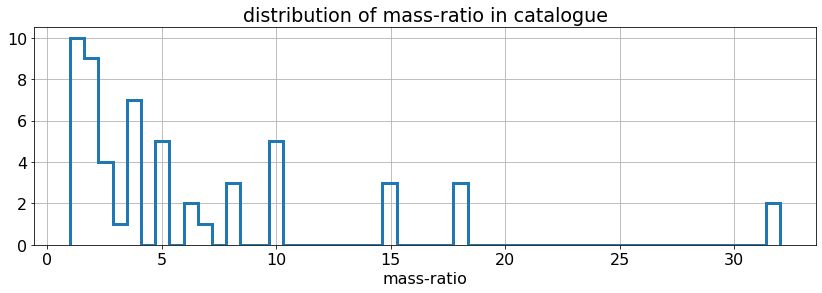

In [10]:
plt.figure(figsize=(14, 4))
plt.hist(df['q'], bins=50, histtype='step', lw=3)
plt.xlabel("mass-ratio");
plt.title("distribution of mass-ratio in catalogue")
plt.grid()

Text(0.5, 1.0, 'q18a0a0c025_96_fine')

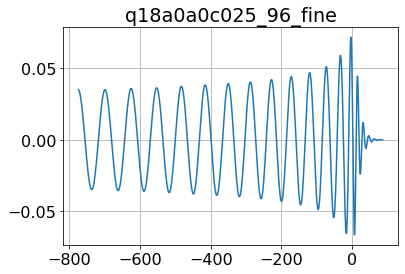

In [11]:
plt.plot(times, strains[0].real)
plt.grid()
plt.title(df.iloc[0]['name'])

# dev class

In [37]:
class Waveform(object):
    def __init__(self, strain, times, amp, phase, freq, q, meta_data=None):
        self.strain = strain
        self.times = times
        self.amp = amp
        self.phase = phase
        self.freq = freq
        self.q = q
        self.eta = phenom.eta_from_q(self.q)
        self.fin_spin = phenom.remnant.FinalSpin0815(self.eta, 0, 0)
        self.fring = phenom.remnant.fring(self.eta, 0, 0, self.fin_spin)
        self.fdamp = phenom.remnant.fdamp(self.eta, 0, 0, self.fin_spin)
        self.meta_data = meta_data

In [40]:
waveforms = [
    Waveform(
        strain=strains[i],
        times=times,
        amp=amps[i],
        phase=phases[i],
        freq=freqs[i],
        q=df['q'].values[i],
        meta_data=df.loc[[i]],
    )
    for i in range(len(strains))]

In [41]:
waveforms[0].q

18.0

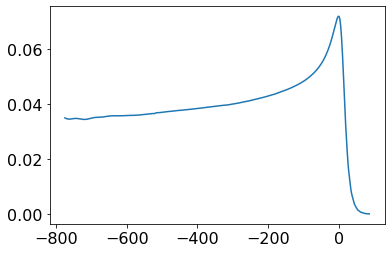

In [42]:
plt.plot(waveforms[0].times, waveforms[0].amp)

In [43]:
waveforms[0].__getattribute__("amp")

array([3.50399838e-02, 3.50327193e-02, 3.50255089e-02, ...,
       9.38912687e-05, 9.18998444e-05, 8.99065997e-05])